## AIM:
The objective is to classify Malicious (Type=1) websites from Benign (Type=0) ones on the basis of various features given in the dataset.<br>
Target variable: `"TYPE"`

## Features:
`URL`: it is the anonimous identification of the URL analyzed in the study <br>
`URL_LENGTH`: it is the number of characters in the URL <br>
`NUMBERSPECIALCHARACTERS`: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=” <br>
`CHARSET`: it is a categorical value and its meaning is the character encoding standard (also called character set). <br>
`SERVER`: it is a categorical value and its meaning is the operative system of the server got from the packet response. <br>
`CONTENT_LENGTH`: it represents the content size of the HTTP header. <br>
`WHOIS_COUNTRY`: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois). <br>
`WHOIS_STATEPRO`: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois). <br>
`WHOIS_REGDATE`: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM <br>
`WHOISUPDATEDDATE`: Through the Whois we got the last update date from the server analyzed <br>
`TCPCONVERSATIONEXCHANGE`: This variable is the number of TCP packets exchanged between the server and our honeypot client <br>
`DISTREMOTETCP_PORT`: it is the number of the ports detected and different to TCP <br>
`REMOTE_IPS`: this variable has the total number of IPs connected to the honeypot <br>
`APP_BYTES`: this is the number of bytes transfered <br>
`SOURCEAPPPACKETS`: packets sent from the honeypot to the server <br>
`REMOTEAPPPACKETS`: packets received from the server <br>
`APP_PACKETS`: this is the total number of IP packets generated during the communication between the honeypot and the server <br>
`DNSQUERYTIMES`: this is the number of DNS packets generated during the communication between the honeypot and the server <br>
`TYPE`: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites <br>

## Approach:
1) Explore the data <br>
2) Clean the relevant data <br>
3) Check imbalances (if any) <br>
4) Use resampling technqiues to resolve imbalances <br>
5) Feature Engineering and Feature Selection <br>
6) Try and finalize a Machine Learning Model <br>
7) Validate our results on Cross-Validation set <br>
8) Final Inferences and Conclusion <br>

#### Importing the required packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv") # importing the dataset

In [3]:
df.head() # checking the head

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
df.info() # checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
df.isna().sum() # Checking the missing values per column

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

#### Checking the imbalance in target variable

In [6]:
100 * df['Type'].value_counts()/len(df)

0    87.871982
1    12.128018
Name: Type, dtype: float64

There is a high imbalance towards Type=0 class. The ratio is around 88%-12%. We'll fix this later using SMOTE.

## Exploratory Data Analysis (EDA)

In [7]:
df.describe() # checking the descriptive stats for each numerical feature

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


### Now let's try finding any trend of other features with respect to Target variables

### 1) Type vs Number of special characters

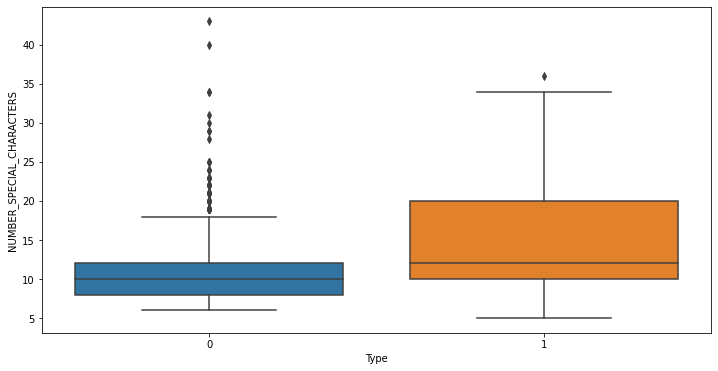

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Type',y='NUMBER_SPECIAL_CHARACTERS');

### Inference: 
The number of special characters for Malicious website is higher than benign ones.

### 2) Type vs URL length

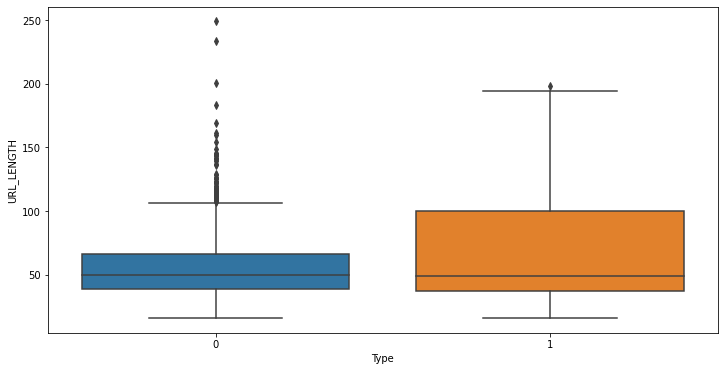

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Type',y='URL_LENGTH');

#### Inference:
The mean length of URL is higher for Malicious website as compared to benign ones.

## Let's do a bit of Data processing and then continue with EDA

#### Let's see how many unique categories are there in each categorical column

In [10]:
for i in df.select_dtypes(include='object').columns:
    print(f"{i} -> {df[i].nunique()}")

URL -> 1781
CHARSET -> 9
SERVER -> 239
WHOIS_COUNTRY -> 49
WHOIS_STATEPRO -> 182
WHOIS_REGDATE -> 891
WHOIS_UPDATED_DATE -> 594


#### Let's create some custom functions to only keep top 5 category in each categorical column and then applying these function to their respective columns

In [11]:
df['CHARSET'].value_counts()

UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1252      1
windows-1251      1
ISO-8859          1
Name: CHARSET, dtype: int64

In [12]:
def CHARSET_CLEANER(x):
    if x not in ['UTF-8','ISO-8859-1','utf-8','us-ascii','iso-8859-1']:
        return "OTHERS"
    else:
        return x

In [13]:
df['CHARSET'] = df['CHARSET'].apply(CHARSET_CLEANER)

In [14]:
df['CHARSET'].value_counts()

UTF-8         676
ISO-8859-1    427
utf-8         379
us-ascii      155
iso-8859-1    134
OTHERS         10
Name: CHARSET, dtype: int64

In [15]:
df['SERVER'].value_counts()

Apache                                                                        386
nginx                                                                         211
None                                                                          175
Microsoft-HTTPAPI/2.0                                                         113
cloudflare-nginx                                                               94
                                                                             ... 
Apache/2.4.10 (Ubuntu)                                                          1
Apache/1.3.34 (Unix) PHP/4.4.4                                                  1
Apache/2.4.6 (Unix) mod_jk/1.2.37 PHP/5.5.1 OpenSSL/1.0.1g mod_fcgid/2.3.9      1
mw2180.codfw.wmnet                                                              1
DPS/1.1.8                                                                       1
Name: SERVER, Length: 239, dtype: int64

In [16]:
def SERVER_CLEANER(x):
    if x not in ['Apache','nginx','None','Microsoft-HTTPAPI/2.0','cloudflare-nginx']:
        return "OTHERS"
    else:
        return x

In [17]:
df['SERVER'] = df['SERVER'].apply(SERVER_CLEANER)

In [18]:
df['SERVER'].value_counts()

OTHERS                   802
Apache                   386
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Name: SERVER, dtype: int64

In [19]:
df['WHOIS_STATEPRO'].value_counts()[:7]

CA           372
None         362
NY            75
WA            65
Barcelona     62
FL            61
Arizona       58
Name: WHOIS_STATEPRO, dtype: int64

In [20]:
def STATE_CLEANER(x):
    if x not in ['CA','None','NY','WA','Barcelona','FL']:
        return "OTHERS"
    else:
        return x

In [21]:
df['WHOIS_STATEPRO'] = df['WHOIS_STATEPRO'].apply(STATE_CLEANER)

In [22]:
df['WHOIS_STATEPRO'].value_counts()

OTHERS       784
CA           372
None         362
NY            75
WA            65
Barcelona     62
FL            61
Name: WHOIS_STATEPRO, dtype: int64

In [23]:
def DATE_CLEANER(x):
    if x == 'None':
        return "Absent"
    else:
        return "Present"

In [24]:
df['WHOIS_REGDATE'] = df['WHOIS_REGDATE'].apply(DATE_CLEANER)

In [25]:
df['WHOIS_UPDATED_DATE'] = df['WHOIS_UPDATED_DATE'].apply(DATE_CLEANER)

In [26]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,Present,Absent,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,OTHERS,15087.0,None,None,Absent,Absent,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,Absent,Absent,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,OTHERS,Present,Present,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,OTHERS,Present,Present,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [27]:
df.drop(['URL','WHOIS_COUNTRY'],axis=1,inplace=True)

In [28]:
df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,Present,Absent,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,OTHERS,15087.0,None,Absent,Absent,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,Absent,Absent,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,OTHERS,Present,Present,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,OTHERS,Present,Present,57,2,5,4278,61,62,129889,4586,61,4.0,0


## EDA continued

### 3) Correlation Heat map

<AxesSubplot:>

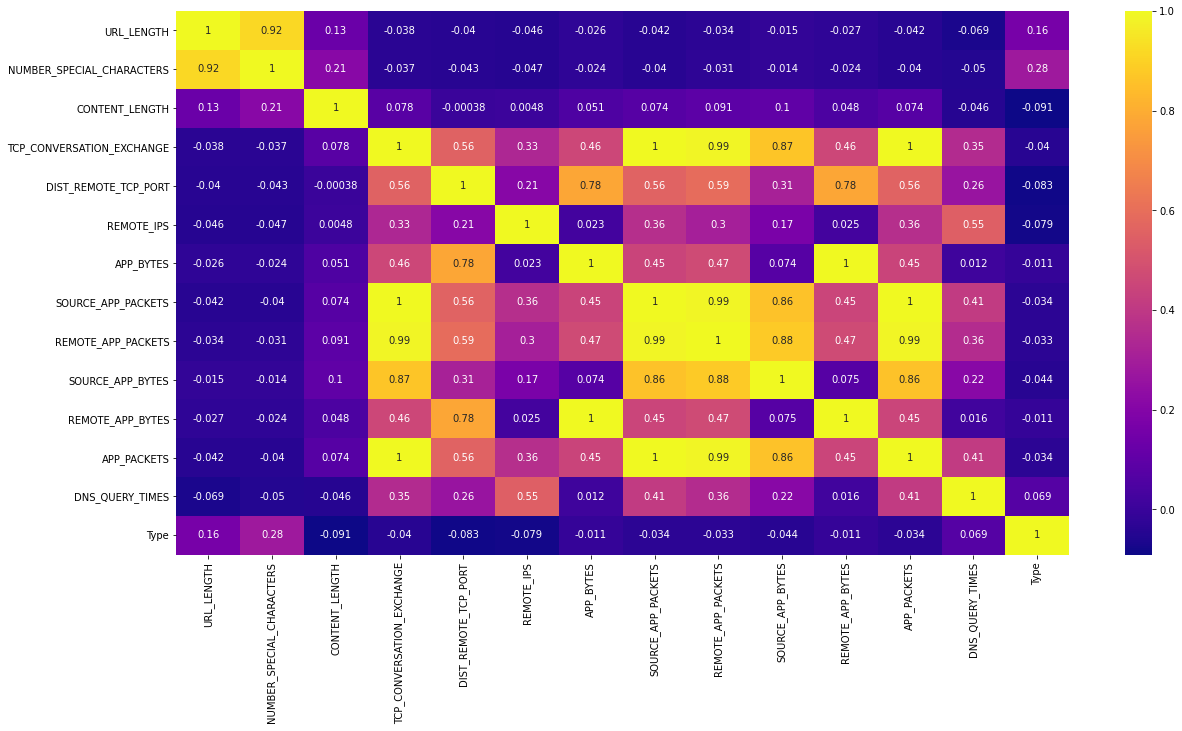

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap='plasma',annot=True)

#### Although we can see some highly correlated features, it won't be wise to remove them all as that could lead us to significant loss in drawing out inferences. Hence, we'll only remove those columns which won;t have much impact on analysis and frther modelling

#### Since Content Length is not significantly correlated with any of the features and also contains a lot of missing values. It would be good if we drop it out.

In [30]:
df2 = df.copy() # creating a copy of our dataframe

In [31]:
df2.drop("CONTENT_LENGTH",axis=1,inplace=True) # dropping the column which is not required

## Feature Engineering and Feature Selection

#### Changing categorical column into dummies

In [32]:
df3 = df2.copy() # creating a copy of the dataframe

In [33]:
df3 = pd.get_dummies(df3,columns=['WHOIS_UPDATED_DATE','WHOIS_REGDATE','WHOIS_STATEPRO','SERVER','CHARSET'],drop_first=True) # creating dummies

In [34]:
df3.head() # checking the head

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,SERVER_Microsoft-HTTPAPI/2.0,SERVER_None,SERVER_OTHERS,SERVER_cloudflare-nginx,SERVER_nginx,CHARSET_OTHERS,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8
0,16,7,7,0,2,700,9,10,1153,832,...,0,0,0,0,1,0,0,1,0,0
1,16,6,17,7,4,1230,17,19,1265,1230,...,0,0,1,0,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,17,6,31,22,3,3812,39,37,18784,4380,...,0,0,0,0,1,0,0,0,0,0
4,17,6,57,2,5,4278,61,62,129889,4586,...,0,1,0,0,0,0,1,0,0,0


In [35]:
df3.isna().sum() # checking for any missing value

URL_LENGTH                      0
NUMBER_SPECIAL_CHARACTERS       0
TCP_CONVERSATION_EXCHANGE       0
DIST_REMOTE_TCP_PORT            0
REMOTE_IPS                      0
APP_BYTES                       0
SOURCE_APP_PACKETS              0
REMOTE_APP_PACKETS              0
SOURCE_APP_BYTES                0
REMOTE_APP_BYTES                0
APP_PACKETS                     0
DNS_QUERY_TIMES                 1
Type                            0
WHOIS_UPDATED_DATE_Present      0
WHOIS_REGDATE_Present           0
WHOIS_STATEPRO_CA               0
WHOIS_STATEPRO_FL               0
WHOIS_STATEPRO_NY               0
WHOIS_STATEPRO_None             0
WHOIS_STATEPRO_OTHERS           0
WHOIS_STATEPRO_WA               0
SERVER_Microsoft-HTTPAPI/2.0    0
SERVER_None                     0
SERVER_OTHERS                   0
SERVER_cloudflare-nginx         0
SERVER_nginx                    0
CHARSET_OTHERS                  0
CHARSET_UTF-8                   0
CHARSET_iso-8859-1              0
CHARSET_us-asc

In [36]:
df3.dropna(inplace=True) # dropping all the missing values

### Using SMOTE to extrapolate our model

`About SMOTE`: Synthetic Minority Oversampling Technique (SMOTE) is a resampling technique which oversamples the minority class by "synthesizing" various parameters and creating new data points by using various "data augmentation" techniques. By this, we get enough numbers of minority class data points to sufficiently carry out the learning processes for the ML model. Hence, we avoid data duplication of minority class (which is the case in oversampling).  

In [37]:
# Importing the SMOTE function
from imblearn.over_sampling import SMOTE

In [38]:
# Creating the set of independent features and target variable
X = df3.drop("Type",axis=1)
y = df3['Type']

In [39]:
from imblearn.under_sampling import RandomUnderSampler  # importing the Under Sampling function

In [40]:
# We shall keep undersampled majority class 50% more than the oversampled minority class. 
# This is being done on order to resemble the composition of original dataframe in the SMOTE's dataframe
undersample = RandomUnderSampler(sampling_strategy=0.5) 

In [41]:
from imblearn.pipeline import Pipeline # Importing the pipeline

In [42]:
# Initializing the SMOTE function. We set our SMOTE function to oversample the minority to the number equal to the majority class. 
#Then, we take 50% of the oversampled minority class (randomly sampled).
oversample = SMOTE(sampling_strategy=0.5) 

In [43]:
steps = [('o',oversample),('u',undersample)] # steps for pipelining. First "do oversampling of the minority class" and then do "undersampling of the majority class"

In [44]:
pipeline = Pipeline(steps=steps) # Creating the pipeline instance

In [45]:
X_smote, y_smote = pipeline.fit_resample(X,y) # Fitting the pipeline to our dataset

In [46]:
y_smote.value_counts() # Taking value counts of the targte feature

0    1564
1     782
Name: Type, dtype: int64

In [47]:
len(X_smote) # checking the total number of samples we have

2346

In [48]:
X_smote.shape # checking the shape

(2346, 30)

### SMOTE has been implemented. Now, we'll start the modelling by first creating a hold-out train and test set and then using stratified cross validation to cover all possibilities

In [49]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate  # Implementing the required functions

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # creating a test holdout set

In [51]:
from sklearn.preprocessing import StandardScaler # import the standard scaling function

In [52]:
sc = StandardScaler() # creating an instance of the scaling function

In [53]:
X_train = sc.fit_transform(X_train) # fitting and transform the training set
X_test = sc.transform(X_test) # just transforming the testing set to avoid 'data leakage'

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,fbeta_score,make_scorer,precision_score,recall_score 
# importing all the metric scores required for evaluation

In [55]:
# creating a dictionary to evaluate metric over stratified k-fold cv
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

### We'll be using tree based ensemble models as they are immune to multicollinearity

### Note: We're interested in a model which has high recall as we want to minimize False Negative Rate at the same time keeping precision high as well. Hence, we need to find a `sweet spot` while evaluating our model

### 1) Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier # importing the function

In [57]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42,class_weight={0:1,1:5},max_depth=5) # creating an instance

In [58]:
rf.fit(X_train,y_train) # fitting the model

RandomForestClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
                       max_depth=5, random_state=42)

In [59]:
rf_cv_f1 = cross_validate(rf,X_test,y_test,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=111),scoring=scoring) 
# cross-validating our model over 5 folds and evaluting metrics are: accuracy, precision, recall and F-1 score

In [60]:
print(f" ACCURACY: {rf_cv_f1['test_accuracy'].mean()}")
print(f" PRECISION: {rf_cv_f1['test_precision'].mean()}")
print(f" RECALL: {rf_cv_f1['test_recall'].mean()}")
print(f" F-1 Score: {rf_cv_f1['test_f1_score'].mean()}")

 ACCURACY: 0.8958528951486698
 PRECISION: 0.6437762237762238
 RECALL: 0.7872727272727272
 F-1 Score: 0.695487012987013


In [61]:
rf_pred = rf.predict(X_test) # predicting on the hold out test set

In [62]:
print(classification_report(y_test,rf_pred)) 
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       304
           1       0.69      0.87      0.77        52

    accuracy                           0.92       356
   macro avg       0.83      0.90      0.86       356
weighted avg       0.93      0.92      0.93       356

[[284  20]
 [  7  45]]


### 2) Catboost

In [63]:
from catboost import CatBoostClassifier # importing the function

In [64]:
cb = CatBoostClassifier(random_state=42,verbose=500,class_weights={0:1,1:5},max_depth=5,early_stopping_rounds=30,boosting_type='Ordered') # creating an instance

In [65]:
cb.fit(X_train,y_train) # fitting the model

Learning rate set to 0.011981
0:	learn: 0.6756274	total: 155ms	remaining: 2m 34s
500:	learn: 0.1157566	total: 3.83s	remaining: 3.81s
999:	learn: 0.0604226	total: 7.52s	remaining: 0us


In [66]:
cb_cv_f1 = cross_validate(cb,X_test,y_test,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42),scoring=scoring)
# cross-validating our model over 5 folds and evaluting metrics are: accuracy, precision, recall and F-1 score

Learning rate set to 0.006019
0:	learn: 0.6857393	total: 9.25ms	remaining: 9.24s
500:	learn: 0.1806446	total: 3.62s	remaining: 3.6s
999:	learn: 0.1018346	total: 7.14s	remaining: 0us
Learning rate set to 0.006028
0:	learn: 0.6866775	total: 6.18ms	remaining: 6.18s
500:	learn: 0.1822175	total: 3.44s	remaining: 3.42s
999:	learn: 0.1087319	total: 6.92s	remaining: 0us
Learning rate set to 0.006028
0:	learn: 0.6867839	total: 6.48ms	remaining: 6.47s
500:	learn: 0.1680272	total: 3.69s	remaining: 3.67s
999:	learn: 0.0988092	total: 7.54s	remaining: 0us
Learning rate set to 0.006028
0:	learn: 0.6867894	total: 6.71ms	remaining: 6.7s
500:	learn: 0.1909167	total: 3.61s	remaining: 3.6s
999:	learn: 0.1079882	total: 7.3s	remaining: 0us
Learning rate set to 0.006028
0:	learn: 0.6872671	total: 6.03ms	remaining: 6.02s
500:	learn: 0.1850676	total: 3.55s	remaining: 3.53s
999:	learn: 0.1092527	total: 7.36s	remaining: 0us


In [67]:
print(f" ACCURACY: {cb_cv_f1['test_accuracy'].mean()}")
print(f" PRECISION: {cb_cv_f1['test_precision'].mean()}")
print(f" RECALL: {cb_cv_f1['test_recall'].mean()}")
print(f" F-1 Score: {cb_cv_f1['test_f1_score'].mean()}")

 ACCURACY: 0.901643192488263
 PRECISION: 0.636451969083548
 RECALL: 0.8272727272727272
 F-1 Score: 0.7126429512516469


In [68]:
cb_pred = cb.predict(X_test) # predicting on the hold out test set

In [82]:
print(classification_report(y_test,cb_pred))
print(confusion_matrix(y_test,cb_pred))
print(precision_score(y_test,cb_pred))
print(recall_score(y_test,cb_pred))
print(f1_score(y_test,cb_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       304
           1       0.79      0.87      0.83        52

    accuracy                           0.95       356
   macro avg       0.88      0.91      0.90       356
weighted avg       0.95      0.95      0.95       356

[[292  12]
 [  7  45]]
0.7894736842105263
0.8653846153846154
0.8256880733944955


### Catboost Classifier is the best optimal model for our data as it is quite robust, immune to multicollinearity and has high recall and F-1 score

### Recall: 0.8653
### Precision: 0.7894
### F-1 Score: 0.8256

### Knowing the dependence of target variable on various feature using Mutual Information Gain 

#### Mutual Information Gain:
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. <br>

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Credits: Krish Naik GitHub repository (Feature Selection) <br>
Link: https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb

#### Before evaluating Mutual information gain, first let's remove those columns which are highly correlated, i.e. we'll first remove high multicollinearity.

In [70]:
def correlation(dataset,threshold):
    col_corr = set() # empty set to avoid repittion later
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold: # abs is taken to consider highly negatively correlated columns as well
                colname = corr_matrix.columns[i] # getting the name of the column
                col_corr.add(colname)
    return col_corr

In [71]:
correlation(X_smote,0.7) # all those columns which ahve more than 70% collinearity

{'APP_BYTES',
 'APP_PACKETS',
 'CHARSET_us-ascii',
 'NUMBER_SPECIAL_CHARACTERS',
 'REMOTE_APP_BYTES',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'SOURCE_APP_PACKETS',
 'WHOIS_REGDATE_Present'}

In [72]:
X_smote2 = X_smote.drop(list(correlation(X_smote,0.7)),axis=1) # removing all those columns which ahve more than 70% collinearity

In [74]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_smote2, y_smote)
mutual_info

array([0.13144412, 0.0598977 , 0.12897923, 0.05382402, 0.08336961,
       0.08412617, 0.07001391, 0.        , 0.02407917, 0.        ,
       0.02230589, 0.00177543, 0.01658418, 0.0316601 , 0.03982705,
       0.01140301, 0.00806902, 0.        , 0.00878469, 0.00569672,
       0.02646063])

In [75]:
mutual_info = pd.Series(mutual_info) # Creating series of column names and their respective mutual information gain
mutual_info.index = X_smote2.columns # setting up index
mutual_info.sort_values(ascending=False) # sorting the values

URL_LENGTH                      0.131444
DIST_REMOTE_TCP_PORT            0.128979
WHOIS_UPDATED_DATE_Present      0.084126
DNS_QUERY_TIMES                 0.083370
WHOIS_STATEPRO_CA               0.070014
TCP_CONVERSATION_EXCHANGE       0.059898
REMOTE_IPS                      0.053824
SERVER_OTHERS                   0.039827
SERVER_None                     0.031660
CHARSET_utf-8                   0.026461
WHOIS_STATEPRO_NY               0.024079
WHOIS_STATEPRO_OTHERS           0.022306
SERVER_Microsoft-HTTPAPI/2.0    0.016584
SERVER_cloudflare-nginx         0.011403
CHARSET_UTF-8                   0.008785
SERVER_nginx                    0.008069
CHARSET_iso-8859-1              0.005697
WHOIS_STATEPRO_WA               0.001775
WHOIS_STATEPRO_None             0.000000
WHOIS_STATEPRO_FL               0.000000
CHARSET_OTHERS                  0.000000
dtype: float64

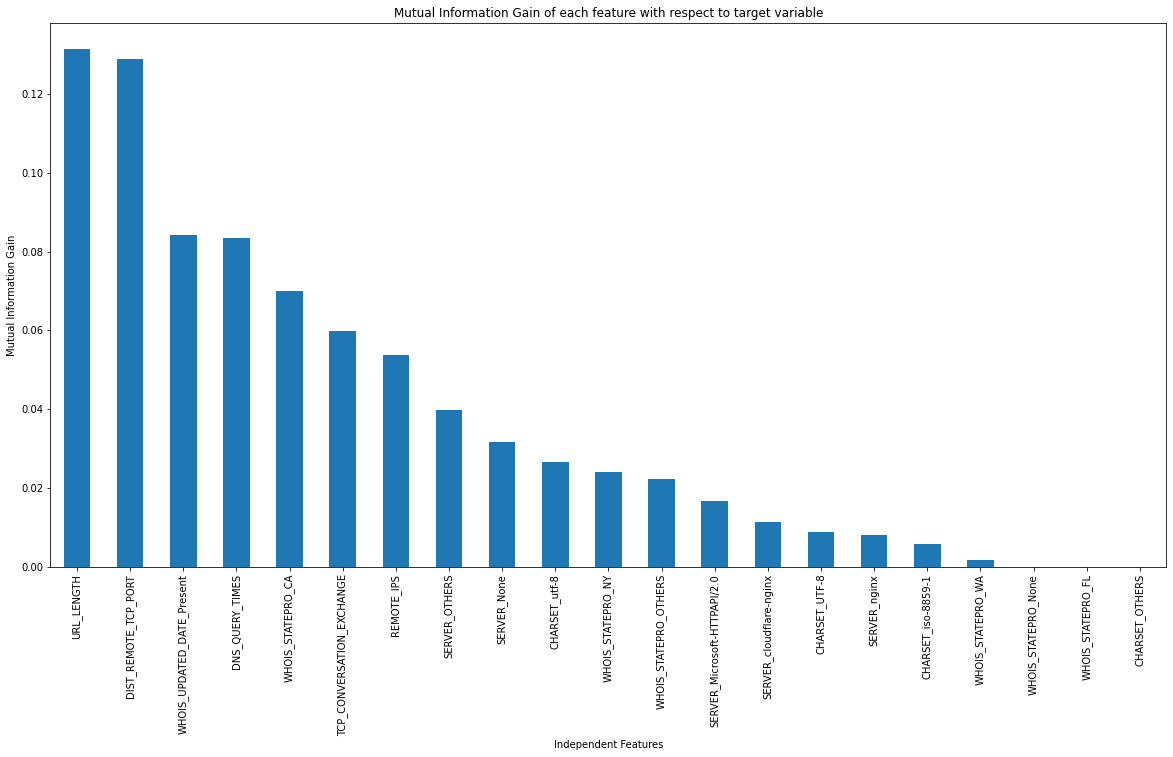

In [81]:
# Bar Plot of Mutual Information Gain with respect to our target variable
plt.ylabel("Mutual Information Gain")
plt.xlabel("Independent Features")
plt.title("Mutual Information Gain of each feature with respect to target variable")
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 10));

### Features like URL_LENGTH, DIST_REMOTE_TCP_PORT, presence of an UPDATE_DATE, DNS_QUERY_TIMES , operation from California state etc. are among the most important features for predicting whether a website is malicious or not